In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

from sklearn.datasets import load_breast_cancer
data = load_breast_cancer(as_frame=True)
df = data.frame
df['target'] = data.target  # Add target
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
# Features and target
X = df.drop(columns=['target'])
y = df['target']

# Split dataset into train and test (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000)

In [4]:
# Predict and evaluate
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.956140350877193
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.91      0.94        43
           1       0.95      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [5]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

print(feature_importance)

                    Feature  Coefficient
0               mean radius     2.099812
11            texture error     1.122469
20             worst radius     0.966303
1              mean texture     0.132486
15        compactness error     0.059602
19  fractal dimension error     0.014251
16          concavity error     0.004522
3                 mean area    -0.002556
9    mean fractal dimension    -0.023564
14         smoothness error    -0.023711
23               worst area    -0.023960
18           symmetry error    -0.041480
17     concave points error    -0.042776
22          worst perimeter    -0.058583
13               area error    -0.065194
10             radius error    -0.085405
29  worst fractal dimension    -0.093083
2            mean perimeter    -0.103468
4           mean smoothness    -0.170243
8             mean symmetry    -0.235070
24         worst smoothness    -0.317660
12          perimeter error    -0.325757
21            worst texture    -0.377126
5          mean 

In [6]:
from sklearn.metrics import roc_auc_score

y_proba = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for positive class
auc = roc_auc_score(y_test, y_proba)
print(f"ROC-AUC Score: {auc:.4f}")

ROC-AUC Score: 0.9977


In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model.fit(X_train_scaled, y_train)
y_pred_scaled = model.predict(X_test_scaled)
print("Scaled Data Accuracy:", accuracy_score(y_test, y_pred_scaled))

Scaled Data Accuracy: 0.9736842105263158


In [8]:
import joblib

# Save the trained model to a file named 'credit_scoring_model.joblib'
joblib_file = "credit_scoring_model.joblib"
joblib.dump(model, joblib_file)

print(f"Model saved to {joblib_file}")

Model saved to credit_scoring_model.joblib


In [9]:
loaded_model = joblib.load(joblib_file)

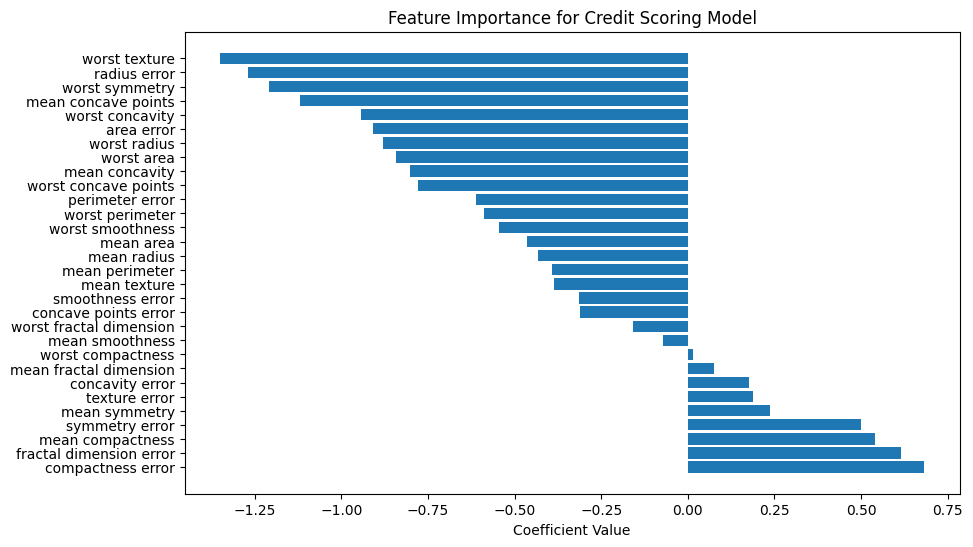

In [10]:
import matplotlib.pyplot as plt

# Create a DataFrame for feature importance (coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
}).sort_values(by='Coefficient', ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feature_importance['Feature'], feature_importance['Coefficient'])
plt.xlabel('Coefficient Value')
plt.title('Feature Importance for Credit Scoring Model')
plt.show()


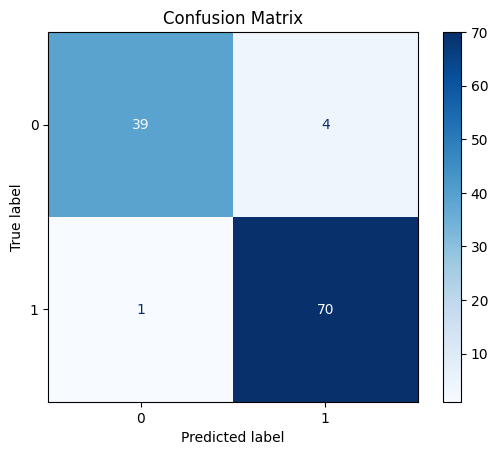

In [12]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create and plot confusion matrix display
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()